In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# read the data
df = pd.read_csv('./BankReviewSentimentAnalysis/data/Merged Data/reddit_google_merged_data_10.csv')
#C:\Users\anilk\OneDrive\Desktop\TextMining\Sentiment Analysis\BankReviewSentimentAnalysis\Logistic_Regression.ipynb

#C:\Users\anilk\OneDrive\Desktop\TextMining\Sentiment Analysis\BankReviewSentimentAnalysis\BankReviewSentimentAnalysis\data
#excluded the na values from the dataset
df=df.dropna(subset=['sentiment_score'])
df = df.dropna(subset=['review_text_processed'])
# ensured the type of Sentiment  column is integer

df['sentiment_score'] = df['sentiment_score'].astype(int)  # Convert to int after dropping NaN

#print("Unique Sentiment values:", df['Sentiment'].unique())

df['sentiment_score'] = df['sentiment_score'].fillna(0)
X = df['review_text_processed']
y = df ['sentiment_score']
'''cleaned_df = pd.DataFrame({
    'cleaned_text': X,
    'Sentiment': y,
    'Review Sentiment': df['Review sentiment']
})
cleaned_df.to_csv('cleaned_data.csv', index=False)
df['Sentiment'] = df['Sentiment'].fillna(0).astype(int)
print(df['Sentiment'].unique())
'''

# Initialize CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# shuffled and split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42 )

#print("X:",X_train)
#print("Y:",y_train)

# shape attribute is used  to contain the number of rows and column
print(X_train.shape, y_train.shape)
#X_train_dense = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())

# Combine features and labels into a single DataFrame
#combined_df = pd.concat([X_train_dense, y_train.reset_index(drop=True)], axis=1)

# Save to CSV
#combined_df.to_csv('X_y_train.csv', index=False)





(28492, 13820) (28492,)


In [5]:
import numpy as np
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clamping to avoid overflow
    return 1/(1+np.exp(-z))
def cost_function(probability, actual):
    epsilon = 1e-10  # Small constant to avoid log(0)
    probability = np.clip(probability, epsilon, 1 - epsilon)  # Avoid log(0)
    actual = np.array(actual)
    return (-actual*np.log(probability)-(1-actual)*np.log(1-probability)).mean()
# using Gradient Descent
def logistic_regression(X, y, num_iterations, learning_rate):
    intercept = np.ones((X.shape[0], 1))
    if hasattr(X, 'toarray'):
        X = X.toarray()  # converting sparse matrix to dense matrix

    # Reshape X to be 2D if it's 1D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.concatenate((intercept, X), axis=1)  # Add intercept term
    
    # Weight initialization
    theta = np.zeros(X.shape[1])
    
    # To store loss and accuracy for plotting
    losses = []
    #accuracies = []
    
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        probability = sigmoid(predictions)
        
        # Gradient calculation
        gradient = np.dot(X.T, (probability - y)) / y.size
        theta = theta - learning_rate * gradient
        
        predictions = np.dot(X, theta)
        probability = sigmoid(predictions)
        # Loss calculation
        loss = cost_function(probability, y)
        print(f"Iteration {i}: Loss = {loss:.4f}")
        losses.append(loss)
        
        # Predict labels for accuracy calculation
        #pred_labels = predict(X, theta)
        #accuracy = (pred_labels == y)  # Compare predicted labels with actual labels
        #accuracies.append(accuracy.mean())   
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return theta, losses
def predict_probability(X, theta):
    intercept = np.ones((X.shape[0], 1))
    if hasattr(X, 'toarray'):
        X = X.toarray()  # Handle sparse matrix case
    
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.concatenate((intercept, X), axis=1)
    predictions = np.dot(X, theta)
    return sigmoid(predictions)

def predict(X, theta, threshold=0.5):
    
    return predict_probability(X,theta) >= threshold

In [ ]:
# Training
theta,losses= logistic_regression(X_train, y_train, num_iterations=10000, learning_rate= 0.001)

y_pred = predict(X_test,theta)
accuracy = (y_pred == y_test)
print("Accuracy: ",accuracy.mean())

Iteration 0: Loss = 0.6919
Iteration 0: Loss = 0.6919
Iteration 1: Loss = 0.6906
Iteration 2: Loss = 0.6893
Iteration 3: Loss = 0.6881
Iteration 4: Loss = 0.6868
Iteration 5: Loss = 0.6856
Iteration 6: Loss = 0.6843
Iteration 7: Loss = 0.6831
Iteration 8: Loss = 0.6818
Iteration 9: Loss = 0.6806
Iteration 10: Loss = 0.6793
Iteration 11: Loss = 0.6781
Iteration 12: Loss = 0.6769
Iteration 13: Loss = 0.6756
Iteration 14: Loss = 0.6744
Iteration 15: Loss = 0.6732
Iteration 16: Loss = 0.6720
Iteration 17: Loss = 0.6707
Iteration 18: Loss = 0.6695
Iteration 19: Loss = 0.6683
Iteration 20: Loss = 0.6671
Iteration 21: Loss = 0.6659
Iteration 22: Loss = 0.6647
Iteration 23: Loss = 0.6635
Iteration 24: Loss = 0.6623
Iteration 25: Loss = 0.6611
Iteration 26: Loss = 0.6599
Iteration 27: Loss = 0.6587
Iteration 28: Loss = 0.6575
Iteration 29: Loss = 0.6564
Iteration 30: Loss = 0.6552
Iteration 31: Loss = 0.6540
Iteration 32: Loss = 0.6528
Iteration 33: Loss = 0.6517
Iteration 34: Loss = 0.6505
Ite

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

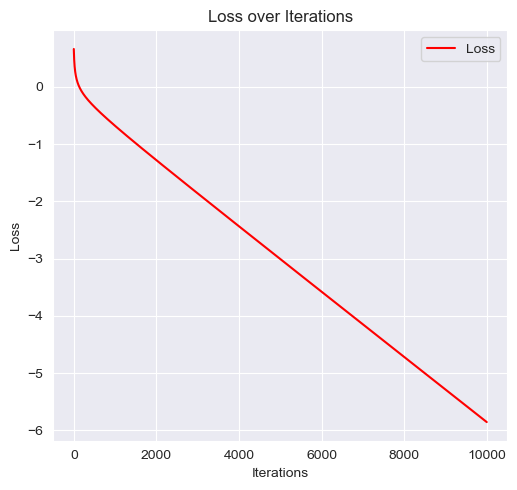

In [27]:

import matplotlib.pyplot as plt
# Plotting accuracy over iterations
plt.figure(figsize=(10, 5))

# Accuracy plot
'''plt.subplot(1, 2, 1)
plt.plot(range(len(accuracies)), accuracies, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.legend()
'''
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(len(losses)), losses, label='Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
y_pred = predict(X_test,theta)
accuracy = (y_pred == y_test)
print("Accuracy: ",accuracy.mean())

'''print(theta.shape)
print(X_test.shape)
print(np.dot(theta.flatten(),X_test))'''

NameError: name 'X_test' is not defined

In [56]:
#Logistic regression using Stochastic Gradient Descent
def logistic_regression(X, Y, num_iterations,learning_rate,batch_size):
    intercept = np.ones((X.shape[0],1))
    Y = np.array(Y)
    # If X is a sparse matrix, convert it to a dense matrix
    if hasattr(X, 'toarray'):
        X = X.toarray()

    # Reshape X to be 2D if it's 1D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X = np.concatenate((intercept, X), axis=1)  # Add intercept term
    theta = np.zeros(X.shape[1])
    print(X.shape,"  ",Y.shape)
    losses = np.zeros(10000)
    for i in range(num_iterations):
        #shuffle the data at begining of iterations
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        x_shuffled = X[indices]
        y_shuffled = Y[indices]
        for start in range(0, X.shape[0], batch_size):
            x_batch = x_shuffled[start:start+batch_size]
            y_batch = y_shuffled[start:start+batch_size]
            
            #predictions
            prediction = np.dot(x_batch,theta)
            probability = sigmoid(prediction)
            if x_batch.shape[0] != y_batch.shape[0]:
                print(f"Batch size mismatch: x_batch {x_batch.shape}, y_batch {y_batch.shape}")
                continue
            #Gradient calculation
            gradient = np.dot(x_batch.T,(probability-y_batch))/y_batch.size
            if np.isnan(gradient).any() or np.isinf(gradient).any():
                print(f"NaN or inf detected in gradient at iteration {i}. Stopping.")
                return theta, losses
            #update theta
            theta = theta - learning_rate* gradient
        
        # calculation
        prediction = np.dot(X,theta)
        probability = sigmoid(prediction)
        loss= cost_function(probability,Y)
        if np.isnan(loss) or np.isinf(loss):
            print(f"NaN or inf detected in loss at iteration {i}. Stopping.")
            return theta, losses
        losses[i] = loss
        print(f"Iteration {i}: Loss = {loss:.4f}")
    return theta, losses        
    

In [58]:

X = cleaned_df['cleaned_text']
y = cleaned_df ['Sentiment']
vectorizer = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# shuffled and split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_tfidf,y,test_size=0.2,random_state=42 )

# Training
theta,losses= logistic_regression(X_train, y_train, num_iterations=1000, learning_rate= 0.01, batch_size=1)

y_pred = predict(X_test,theta)
accuracy = (y_pred == y_test)
print("Accuracy: ",accuracy.mean())

(7380, 11571)    (7380,)
Iteration 0: Loss = -1.1417
Iteration 1: Loss = -0.9894
Iteration 2: Loss = -0.9102
Iteration 3: Loss = -0.8475
Iteration 4: Loss = -0.8119
Iteration 5: Loss = -0.7867
Iteration 6: Loss = -0.7682
Iteration 7: Loss = -0.7540
Iteration 8: Loss = -0.7459
Iteration 9: Loss = -0.7384
Iteration 10: Loss = -0.7350
Iteration 11: Loss = -0.7365
Iteration 12: Loss = -0.7337
Iteration 13: Loss = -0.7281
Iteration 14: Loss = -0.7233
Iteration 15: Loss = -0.7189
Iteration 16: Loss = -0.7149
Iteration 17: Loss = -0.7197
Iteration 18: Loss = -0.7234
Iteration 19: Loss = -0.7159
Iteration 20: Loss = -0.7175
Iteration 21: Loss = -0.7185
Iteration 22: Loss = -0.7196
Iteration 23: Loss = -0.7187
Iteration 24: Loss = -0.7182
Iteration 25: Loss = -0.7188
Iteration 26: Loss = -0.7158
Iteration 27: Loss = -0.7165
Iteration 28: Loss = -0.7150
Iteration 29: Loss = -0.7112
Iteration 30: Loss = -0.7158
Iteration 31: Loss = -0.7137
Iteration 32: Loss = -0.7087
Iteration 33: Loss = -0.7132

In [63]:
def gradient_descent(X, y, learning_rate=0.01, batch_size=16, epochs=100):
    m, n = X.shape
    y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
    theta = np.random.randn(n, 1)  # Random initialization of theta (weights)

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Gradient calculation
            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

    return theta

In [67]:
def mean_absolute_error(y_train ,predictions):
    # Ensure y and predictions are NumPy arrays
    y_train = np.array(y)
    predictions = np.array(predictions)
    
    # Compute the absolute differences
    absolute_errors = np.abs(y_train - predictions)
    
    # Compute the mean of the absolute errors
    mae = np.mean(absolute_errors)
    
    return mae
print(X_train.shape,y_train.shape)
theta = gradient_descent(X_train, y_train)

# Predict and calculate MAE
predictions = X_train.dot(theta)
mae = mean_absolute_error(y_train, predictions)
print(f"MAE: {mae}")  

(7380, 11570) (7380,)


ValueError: operands could not be broadcast together with shapes (4,16) (4,) 

In [74]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

def gradient_descent(X, y, learning_rate=0.001, batch_size=16, epochs=100):
    m, n = X.shape  # m = number of samples, n = number of features
    y = np.array(y).reshape(-1, 1)  # Ensure y is a column vector
    theta = np.random.randn(n, 1)  # Random initialization of theta (weights)

    for epoch in range(epochs):
        # Shuffle the data at the beginning of each epoch
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]

            # Ensure xi and yi have compatible shapes for dot product
            if xi.shape[0] != yi.shape[0]:
                print(f"Shape mismatch: xi {xi.shape}, yi {yi.shape}")
                continue

            # Debugging: Print the shapes
            print(f"xi shape: {xi.shape}, yi shape: {yi.shape}, theta shape: {theta.shape}")

            # Gradient calculation
            predictions = xi.dot(theta)
            gradients = 2 / xi.shape[0] * xi.T.dot(predictions - yi)  # batch_size is xi.shape[0] here

            # Update theta (weights)
            theta = theta - learning_rate * gradients

            # Check for NaN or infinity in theta
            if np.isnan(theta).any() or np.isinf(theta).any():
                print("NaN or Infinity detected in theta! Stopping.")
                return theta

    return theta

# Vectorize the data
X = cleaned_df['cleaned_text']
y = cleaned_df['Sentiment']

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Convert sparse matrix to dense for scaling
X_dense = X_tfidf.toarray()

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape: ", X_train.shape, y_train.shape)

# Run gradient descent
theta = gradient_descent(X_train, y_train, learning_rate=0.001, batch_size=16, epochs=100)

# Predict and calculate MAE
predictions = X_train.dot(theta)
mae = mean_absolute_error(y_train, predictions)
print(f"Mean Absolute Error: {mae}")


Shape:  (7380, 11570) (7380,)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), theta shape: (11570, 1)
xi shape: (16, 11570), yi shape: (16, 1), thet

C:\Users\anilk\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN.